In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, f1_score

In [ ]:
warnings.filterwarnings('ignore')

1. Load the file data.csv, explore the data showing size and do some data exploration

In [ ]:
df = pd.read_csv('data.csv', index_col=0)
print(f'{df.head()}\n')
print(f'size of df: {df.shape}\n')
print(f'{df.describe()}\n')
print(f'{df.info()}\n')
print(f'{df.isnull().sum()}\n')

   F00       F01       F02       F03       F04       F05       F06       F07  \
0  NaN  0.430770 -0.609499  0.153154 -0.244014  1.515603  0.153154  0.950208   
1  NaN  0.926832 -1.232067 -2.397645 -2.147707 -0.907709 -2.397645 -3.431166   
2  NaN  1.488724  1.732096 -0.247872  2.564819 -0.744121 -0.247872 -0.298340   
3  NaN  0.476623  0.494316  0.585131  0.434526 -0.670993  0.585131  1.527264   
4  NaN  1.873207 -0.399677 -1.768674  0.600575  0.274092 -1.768674 -2.147604   

        F08       F09       F10       F11  F12 F13       F14  class  
0 -0.533577  0.153154 -1.188635  0.117022    0   D  0.078747      1  
1 -0.851632 -2.397645 -0.614415 -0.641244    0   C -0.277881      1  
2 -0.276540 -0.247872  1.395205 -0.290211    6   B  1.070634      0  
3  0.370484  0.585131 -0.549108  0.009128    0   B  0.524313      1  
4  0.623849 -1.768674 -0.387073 -0.470436    3   D  0.411954      2  

size of df: (1000, 16)

             F00          F01          F02          F03          F04  \
co

<Axes: >

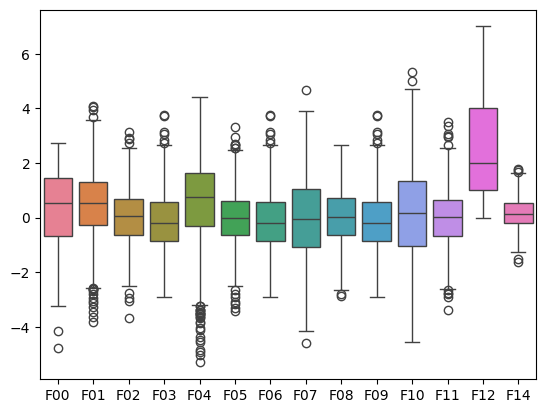

In [ ]:
sns.boxplot(df.drop(columns=['class']))

2. Deal with null values, imputing the mean for numeric features and the
string “unknown” for categorical features

In [ ]:
num = df.select_dtypes(include = 'number').columns
cat = df.select_dtypes(include = 'object').columns

df[num] = df[num].fillna(df[num].mean())
df[cat] = df[cat].fillna('unknown')

df.isnull().sum()

,0
F00,0
F01,0
F02,0
F03,0
F04,0
F05,0
F06,0
F07,0
F08,0
F09,0


In [ ]:
df = pd.get_dummies(df)
df.head()

,F00,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F14,class,F13_A,F13_B,F13_C,F13_D
0,0.190899,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,0.078747,1,False,False,False,True
1,0.190899,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,-0.277881,1,False,False,True,False
2,0.190899,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,1.070634,0,False,True,False,False
3,0.190899,0.476623,0.494316,0.585131,0.434526,-0.670993,0.585131,1.527264,0.370484,0.585131,-0.549108,0.009128,0,0.524313,1,False,True,False,False
4,0.190899,1.873207,-0.399677,-1.768674,0.600575,0.274092,-1.768674,-2.147604,0.623849,-1.768674,-0.387073,-0.470436,3,0.411954,2,False,False,False,True


3. train, optimize and test two classifier models of your choice, the
optimization must be done with cross validation, optimize the f1
score_macro

In [ ]:
x = df.drop(columns=['class'])
y = df['class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)
# DECISION TREE CLASSIFIER
tree = DecisionTreeClassifier(random_state = 42)

params_grid ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 8, 10],
    'min_samples_leaf' : [2,5,10]
}

gridt = GridSearchCV(tree, param_grid = params_grid, scoring ='f1_macro', cv=5)
gridt.fit(xtrain, ytrain)
ypred = gridt.predict(xtest)

print(f'best params for decision tree: {gridt.best_params_}')
print(f'best model for decision tree: {gridt.best_estimator_}')
print(f'best score for decision tree: {gridt.best_score_:.4f}')

best params for decision tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
best model for decision tree: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)
best score for decision tree: 0.6051


In [ ]:
# RANDOM FOREST CLASSIFIER

RF = RandomForestClassifier(random_state=42)
param_gridRF = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 8, 10],
    'min_samples_leaf' : [2,5,10]
}

gridRF = GridSearchCV(RF, param_grid = param_gridRF, cv = 5, scoring='f1_macro')
gridRF.fit(xtrain, ytrain)
ypredRF = gridRF.predict(xtest)

4. show the result for both models, including the optimal hyperparameter
values

In [ ]:
print(f'best params for decision tree: {gridt.best_params_}')
print(f'best model for decision tree: {gridt.best_estimator_}')
print(f'best score for decision tree: {gridt.best_score_:.4f}')

print(f'best params for random forest: {gridRF.best_params_}')
print(f'best model for random forest: {gridRF.best_estimator_}')
print(f'best score for random forest: {gridRF.best_score_:.4f}\n')

if gridt.best_score_ > gridRF.best_score_:
  print('best score Decision Tree Classifier model')
else:
  print('best score Random Forest Classifier model')


best params for decision tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
best model for decision tree: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)
best score for decision tree: 0.6051
best params for random forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}
best model for random forest: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42)
best score for random forest: 0.5696

best score Decision Tree Classifier model


5. repeat the experiment using the best model found in the previous steps and doing feature selection

In [ ]:
best_model = gridt.best_estimator_
best_model.fit(xtrain,ytrain)

selector = SelectFromModel(best_model, prefit=True)
xtrainsel = selector.transform(xtrain)
xtestsel = selector.transform(xtest)

model_selected = DecisionTreeClassifier(**gridt.best_params_, random_state=42)
model_selected.fit(xtrainsel, ytrain)

ypredsel = model_selected.predict(xtestsel)
f1 = f1_score(ytest, ypredsel, average = 'macro')

print(f"Score Vecchio (Tutte le feature): 0.6051")
print(f"Score Nuovo (Feature selezionate): {f1:.4f}")

Score Vecchio (Tutte le feature): 0.6051
Score Nuovo (Feature selezionate): 0.6812


6. show the results with the best hyperparameter values

In [ ]:
print(f'{classification_report(ytest, ypredsel)}')

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       113
           1       0.79      0.83      0.81        76
           2       0.43      0.27      0.33        11

    accuracy                           0.84       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.83      0.84      0.84       200



7. comment the results of the two experiments

**1. Model Comparison (Experiment 1)**
In the first phase, I compared a Decision Tree and a Random Forest.

* **Decision Tree F1 Macro:** 0.6051
* **Random Forest F1 Macro:** 0.5581



Unexpectedly, the **single Decision Tree performed better** than the ensemble model. This suggests that for this specific dataset, the Random Forest might have suffered from the high dimensionality or noise in the unselected features, whereas the single tree (optimized via GridSearch) managed to find a better local split.

**2. Feature Selection Analysis (Experiment 2)**
Using the Decision Tree's feature importance, I removed the less relevant features and retrained the model.

* **Score Improvement:** The F1 Macro score increased significantly from **0.6051** to **0.6812**.

> **Conclusion:** This confirms that the original dataset contained "noisy" or irrelevant features that were causing overfitting. By removing them, the model generalized better on the test set.

**3. Class Imbalance Observation**
Looking at the final Classification Report, there is a disparity in performance across classes:

* **Class 0 and 1:** Have high F1 scores (0.90 and 0.81).
* **Class 2:** Has a very low F1 score (0.33).



This is due to the **class imbalance**: the support (number of samples) for Class 2 is only 11, compared to 113 for Class 0. The model simply did not have enough examples to learn Class 2 effectively.